In [1]:
import pandas as pd
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt

In [3]:
def triangle(x, dx, center):
    return_func = np.zeros(shape=(len(x),), dtype=np.float)
    for ii, val in enumerate(x):
        if val > (center - dx) and val <= center:
            return_func[ii] = (val - center)/dx + 1
        if val <= (center + dx) and val > center:
            return_func[ii] = (center - val)/dx + 1
    return return_func

In [35]:
def gradTriangle(x, dx, center):
    return_func = np.zeros(shape=(len(x),), dtype=np.float)
    for ii, val in enumerate(x):
        if val > (center - dx) and val <= center:
            return_func[ii] = 1.0/dx 
        if val <= (center + dx) and val > center:
            return_func[ii] = -1.0/dx 
        if val == (center + dx) or val == (center - dx):
            return_func[ii] = 0.0
    return return_func

In [36]:
def error(alpha, *args):
    return np.power(np.dot(alpha,gradB)-D, 2).sum()

In [37]:
ABF_out = pd.read_csv('ABF_bias_out.txt',sep='\t')
ABF_out.columns = ['Bin','Xi','Hist','Mean Grad', 'bias', 'dF', 'dF geom']

In [38]:
xi = np.array(ABF_out['Xi'])
nbins = len(xi)
dxi = abs(xi[1]-xi[0])
xi_new = np.linspace(-49.75, 49.75, 4*nbins)
dxi_new = abs(xi_new[1]-xi_new[0])

In [51]:
alpha = np.ones(shape=(len(xi),), dtype=np.float)
B     = np.zeros(shape=(len(xi),len(xi)), dtype=np.float)
gradB = np.zeros(shape=(len(xi),len(xi_new)), dtype=np.float)

In [52]:
for ii in range(len(xi)):
    B[ii]     = triangle(xi, dxi, xi[ii])
    gradB[ii] = gradTriangle(xi_new, dxi, xi[ii])

In [56]:
D = np.array(ABF_out['bias'])
D = np.interp(xi_new, xi, D)

In [65]:
result = opt.minimize(error, alpha, args=(gradB, D), method='L-BFGS-B')
print('Iterations:\t%14.10f' % (result['nit']))
print('Error:\t\t%14.10f' % (result['fun']))
F = np.dot(result.x,B)
F -= F.min()

Iterations:	120.0000000000
Error:		  0.0000002144


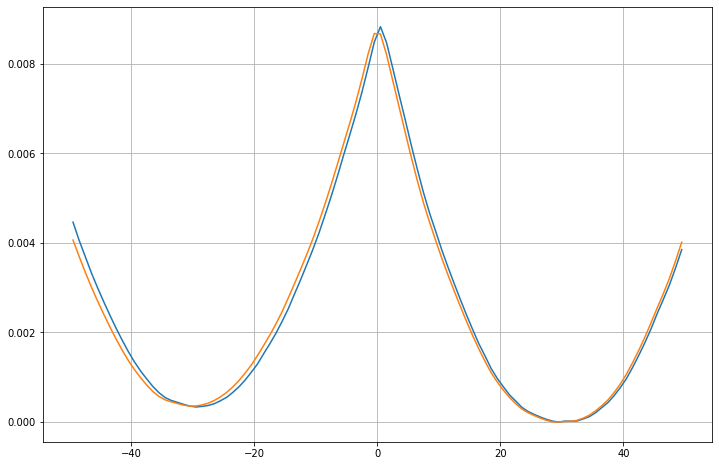

In [68]:
plt.rcParams["figure.figsize"] = [12,8]
fig, ax1 = plt.subplots()
#
xi_0 = np.array(ABF_out['Xi'])
F_0 = np.array(ABF_out['dF'])
ax1.plot(xi_0, F_0)
ax1.plot(xi, F)
ax1.grid()
plt.show()